In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import vlsvtools
import vdfplot

Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using LaTeX formatting
Using backend module://matplotlib_inline.backend_inline
Using matplotlib version 3.5.1


# The CSV has lots of columns
Feel free to play around

In [2]:
IMGPATH = 'plots/vdf_overview_20220317_SLURM71721410'
CSVFILE = 'output/vdfsample_20220317_SLURM71721393.csv'
df = pd.read_csv(CSVFILE)
df

,fileid,cellid,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,s0_zeros,...,s24_kurt,s24_zeros,mean,zeros,partials,gap,spatial_x,spatial_y,spatial_z,pngfile
0,0,1,0.000178,0.000181,0.000179,0.000180,5.946515e-13,-0.067948,-0.766838,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-149925000.0,0.0,0.0,f0000000c00001.png
1,0,26,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-146175000.0,0.0,0.0,f0000000c00026.png
2,0,51,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-142425000.0,0.0,0.0,f0000000c00051.png
3,0,76,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-138675000.0,0.0,0.0,f0000000c00076.png
4,0,101,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-134925000.0,0.0,0.0,f0000000c00101.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,15,1076,0.000347,0.000564,0.000447,0.000448,2.351546e-09,0.209591,-0.625858,0.0,...,-3.0,1.0,0.000024,0.40,0.44,1,11325000.0,0.0,0.0,f0000015c01076.png
764,15,1101,0.000346,0.000565,0.000447,0.000446,2.349635e-09,0.207436,-0.601140,0.0,...,-3.0,1.0,0.000024,0.36,0.48,1,15075000.0,0.0,0.0,f0000015c01101.png
765,15,1126,0.000348,0.000567,0.000447,0.000447,2.388199e-09,0.206718,-0.612593,0.0,...,-3.0,1.0,0.000024,0.32,0.52,1,18825000.0,0.0,0.0,f0000015c01126.png
766,15,1151,0.000347,0.000568,0.000448,0.000449,2.345123e-09,0.177765,-0.628368,0.0,...,-3.0,1.0,0.000024,0.36,0.48,1,22575000.0,0.0,0.0,f0000015c01151.png


# k-Means

In [3]:
# I just slapped these four vars into k-means:
cols = ['gap', 'mean', 'zeros', 'partials']
kmeans = KMeans(n_clusters=6).fit(df[cols].values)

## Elbow curve

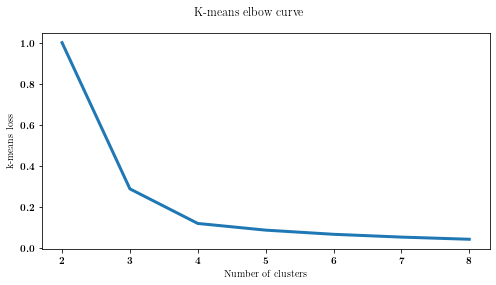

In [4]:
def plot_kmeans_elbow_curve(X, ax, max_centroids=8):
    loss = np.zeros(max_centroids-1)
    for i in range(2, max_centroids+1):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
        loss[i-2] = kmeans.inertia_
    loss = loss / loss.max()
    ax.plot(range(2, max_centroids+1), loss, lw=3)

fig, ax = plt.subplots(figsize=(7, 4))
plt.suptitle('K-means elbow curve')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('k-means loss')
plot_kmeans_elbow_curve(df[cols].values, ax=ax)
plt.tight_layout()
plt.savefig('plots/kmeans_elbow.png', dpi=300)

In [5]:
kmeans_df = pd.DataFrame(df[['fileid', 'cellid',
                             'spatial_x', 'spatial_y', 'spatial_z',
                             'pngfile']])
kmeans_df.insert(2, 'class', kmeans.labels_)
kmeans_df

,fileid,cellid,class,spatial_x,spatial_y,spatial_z,pngfile
0,0,1,0,-149925000.0,0.0,0.0,f0000000c00001.png
1,0,26,0,-146175000.0,0.0,0.0,f0000000c00026.png
2,0,51,0,-142425000.0,0.0,0.0,f0000000c00051.png
3,0,76,0,-138675000.0,0.0,0.0,f0000000c00076.png
4,0,101,0,-134925000.0,0.0,0.0,f0000000c00101.png
...,...,...,...,...,...,...,...
763,15,1076,5,11325000.0,0.0,0.0,f0000015c01076.png
764,15,1101,1,15075000.0,0.0,0.0,f0000015c01101.png
765,15,1126,1,18825000.0,0.0,0.0,f0000015c01126.png
766,15,1151,1,22575000.0,0.0,0.0,f0000015c01151.png


# $\rho$ plot

In [6]:
dataset = vlsvtools.VLSVdataset('data')
rhos = dataset.get_rhos()

INFO:vlsvtools:Found 16 files.
INFO:vlsvtools:Found 1200 cells in data/bulk.0000015.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000003.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000002.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000014.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000013.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000005.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000009.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000008.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000004.vlsv
INFO:vlsvtools:Found VDF data in 48 cells
INFO:vlsvtools:Found 1200 cells in data/bulk.0000012.vlsv
INFO:vlsvto

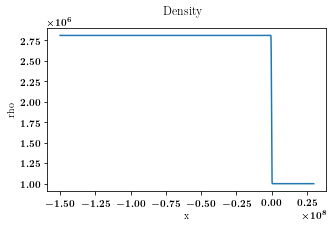

In [7]:
rho = rhos[15]
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_ylabel("rho")
ax.set_xlabel("x")
plt.suptitle("Density")
_ = plt.plot(rho[:,0], rho[:,3])

# Spatial visualization

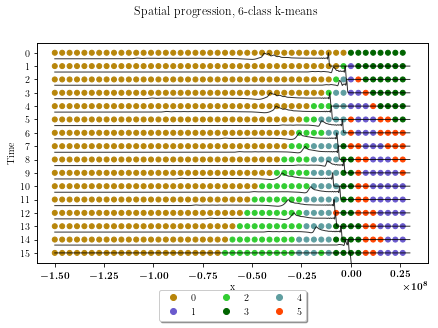

In [8]:
cmap = mpl.colors.ListedColormap(['darkgoldenrod', 'slateblue', 'limegreen', 'darkgreen', 'cadetblue', 'orangered'])
norm = mpl.colors.BoundaryNorm(np.arange(7)-0.5, cmap.N)

fig, ax = plt.subplots(figsize=(7, 5))
for t_idx in range(16):
    snapshot = kmeans_df[kmeans_df['fileid'] == t_idx]
    s = ax.scatter(snapshot['spatial_x'], [-t_idx]*len(snapshot), c=snapshot['class'], s=25, cmap=cmap, norm=norm)
    if t_idx == 12:
        legend_handles = s.legend_elements()[0]
ax.set_yticks(range(-15, 1))
ax.set_yticklabels(range(15, -1, -1))
ax.set_ylabel('Time')
ax.set_xlabel('x')

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.axes.yaxis.set_visible(False)
for i in range(16):
    x = rhos[i][:,0]
    rho = rhos[i][:,3]
    ax2.plot(x, (rho-1e6) / (rho.max()-1e6) - (i) - 1, color='black', lw=1, alpha=0.8)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

plt.legend(handles=legend_handles, 
           labels=['0', '1', '2', '3', '4', '5'],
           loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.suptitle('Spatial progression, 6-class k-means')
plt.savefig('plots/kmeans_6class_spatial.png', facecolor='white', transparent=False, dpi=300)

# Image grouping

In [9]:
## group images by class into folders
#classes = list(zip(df['pngfile'], kmeans.labels_))
#for item in classes:
#    if not os.path.isdir(f'{IMGPATH}/{item[1]}'):
#        os.mkdir(f'{IMGPATH}/{item[1]}')
#    else:
#        break
#    os.rename(f'{IMGPATH}/{item[0]}', f'{IMGPATH}/{item[1]}/{item[0]}')

# VDF plotting

In [10]:
dataset = vlsvtools.VLSVdataset('data')

INFO:vdfplot:loading cell 15:926


Getting offsets for population proton


INFO:vdfplot:processing VDF in cell 15:926


[<Figure size 1080x1080 with 4 Axes>]

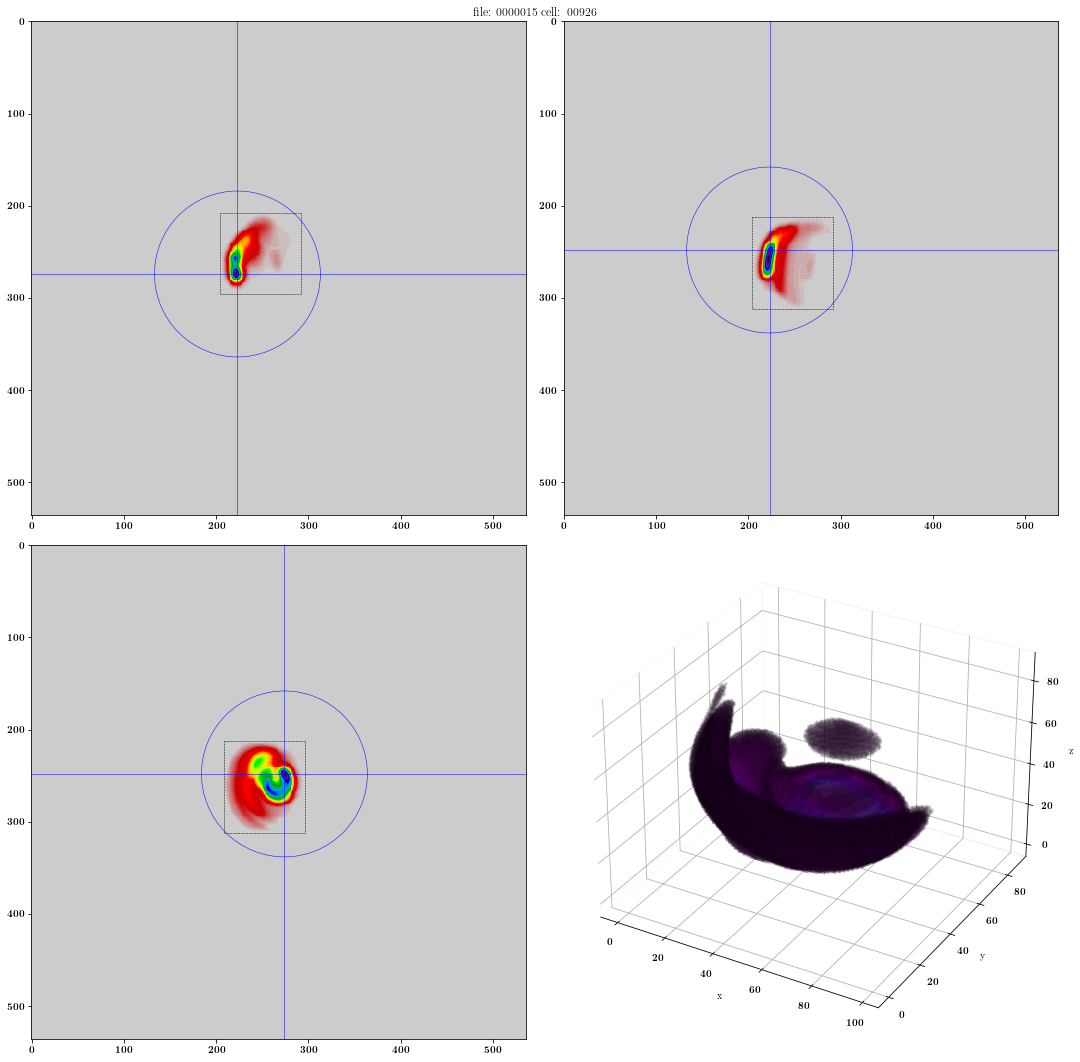

In [11]:
vdfplot.plot(dataset[(15, 926)])

In [12]:
#vdfplot.plot(dataset.vdf_cells[:2])

# Sampler / raw spherical data

In [13]:
SAMPLEPATH = 'samples/vdfsample_20220317_SLURM71721393'

import vdfsample
sampler, samples = vdfsample.load_samples(SAMPLEPATH)

In [14]:
# show sampling parameters used
print(sampler)

n_spheres: 25
n_points: 100000
r_max: 90.0
distribution: radius
applied transformations: ['abs', 'cbrt']



In [15]:
# how many points on each sphere?
np.array([len(s) for s in sampler.spheres])

array([ 308,  616,  924, 1231, 1539, 1847, 2154, 2462, 2770, 3077, 3385,
       3693, 4000, 4307, 4615, 4923, 5230, 5538, 5846, 6153, 6461, 6769,
       7076, 7384, 7692])

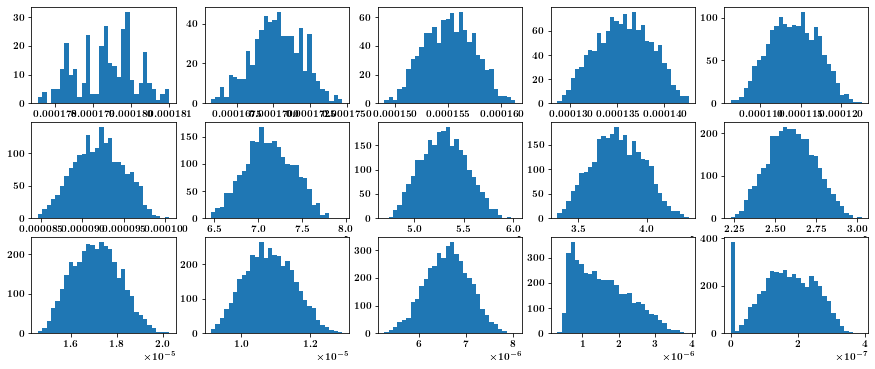

In [16]:
# distributions on different spherical shells
shells = samples[100].shells
fig, ax = plt.subplots(3, 5, figsize=(15, 6))
ax = ax.flatten()
for i in range(15):
    ax[i].hist(shells[i], bins=30, density=False)